In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
from matplotlib import rcParams
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from scipy import stats
from imblearn import under_sampling, over_sampling

In [2]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/

Mounted at /content/drive
/content/drive/MyDrive


In [3]:
df2 = pd.read_csv('/content/drive/MyDrive/application_train.csv')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [ ]:
df2['TARGET'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 307511 entries, 0 to 307510
Series name: TARGET
Non-Null Count   Dtype
--------------   -----
307511 non-null  int64
dtypes: int64(1)
memory usage: 2.3 MB


In [4]:
df = pd.read_csv('/content/drive/MyDrive/credit_card_balance.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  int64  
 1   SK_ID_CURR                  int64  
 2   MONTHS_BALANCE              int64  
 3   AMT_BALANCE                 float64
 4   AMT_CREDIT_LIMIT_ACTUAL     int64  
 5   AMT_DRAWINGS_ATM_CURRENT    float64
 6   AMT_DRAWINGS_CURRENT        float64
 7   AMT_DRAWINGS_OTHER_CURRENT  float64
 8   AMT_DRAWINGS_POS_CURRENT    float64
 9   AMT_INST_MIN_REGULARITY     float64
 10  AMT_PAYMENT_CURRENT         float64
 11  AMT_PAYMENT_TOTAL_CURRENT   float64
 12  AMT_RECEIVABLE_PRINCIPAL    float64
 13  AMT_RECIVABLE               float64
 14  AMT_TOTAL_RECEIVABLE        float64
 15  CNT_DRAWINGS_ATM_CURRENT    float64
 16  CNT_DRAWINGS_CURRENT        int64  
 17  CNT_DRAWINGS_OTHER_CURRENT  float64
 18  CNT_DRAWINGS_POS_CURRENT    float64
 19  CNT_INSTALMENT_MATURE

In [5]:
df2_selected = df2[['SK_ID_CURR', 'TARGET']] #Mengambil Kolom SK ID Curr dan Target dari application train

In [6]:
merged_df = pd.merge(df, df2_selected, on='SK_ID_CURR', how='inner') #Menggabungkan dataset credit card balance dan application train
merged_df.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF,TARGET
0,2582071,363914,-1,63975.555,45000,2250.0,2250.000,0.0,0.000,2250.00,...,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0,1
1,1389973,337855,-4,236572.110,225000,2250.0,2250.000,0.0,0.000,11795.76,...,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0,0
2,1891521,126868,-1,453919.455,450000,0.0,11547.000,0.0,11547.000,22924.89,...,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0,0
3,2181852,367360,-4,291543.075,292500,90000.0,289339.425,0.0,199339.425,130.50,...,286831.575,3.0,8,0.0,5.0,3.0,Active,0,0,0
4,1235299,203885,-5,201261.195,225000,76500.0,111026.700,0.0,34526.700,6338.34,...,197224.695,3.0,9,0.0,6.0,38.0,Active,0,0,0


In [ ]:
missing_values = df.isna().sum()
print(missing_values[missing_values > 0])

AMT_DRAWINGS_ATM_CURRENT      749816
AMT_DRAWINGS_OTHER_CURRENT    749816
AMT_DRAWINGS_POS_CURRENT      749816
AMT_INST_MIN_REGULARITY       305236
AMT_PAYMENT_CURRENT           767988
CNT_DRAWINGS_ATM_CURRENT      749816
CNT_DRAWINGS_OTHER_CURRENT    749816
CNT_DRAWINGS_POS_CURRENT      749816
CNT_INSTALMENT_MATURE_CUM     305236
dtype: int64


In [ ]:
nan_columns = df.columns[df.isna().any()].tolist()
print('Kolom yang memiliki missing values', nan_columns)

Kolom yang memiliki missing values ['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY', 'AMT_PAYMENT_CURRENT', 'CNT_DRAWINGS_ATM_CURRENT', 'CNT_DRAWINGS_OTHER_CURRENT', 'CNT_DRAWINGS_POS_CURRENT', 'CNT_INSTALMENT_MATURE_CUM']


In [ ]:
numeric=['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_num=df.select_dtypes(include=numeric)
df_num.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.000,0.0,1,0.0,1.0,35.0,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,60175.080,64875.555,64875.555,1.0,1,0.0,0.0,69.0,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,26926.425,31460.085,31460.085,0.0,0,0.0,0.0,30.0,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,224949.285,233048.970,233048.970,1.0,1,0.0,0.0,10.0,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,443044.395,453919.455,453919.455,0.0,1,0.0,1.0,101.0,0,0


In [ ]:
numerics = df_num.columns.tolist()
print(numerics)

['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'AMT_BALANCE', 'AMT_CREDIT_LIMIT_ACTUAL', 'AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY', 'AMT_PAYMENT_CURRENT', 'AMT_PAYMENT_TOTAL_CURRENT', 'AMT_RECEIVABLE_PRINCIPAL', 'AMT_RECIVABLE', 'AMT_TOTAL_RECEIVABLE', 'CNT_DRAWINGS_ATM_CURRENT', 'CNT_DRAWINGS_CURRENT', 'CNT_DRAWINGS_OTHER_CURRENT', 'CNT_DRAWINGS_POS_CURRENT', 'CNT_INSTALMENT_MATURE_CUM', 'SK_DPD', 'SK_DPD_DEF']


In [ ]:
df_cat=df.select_dtypes(include='object')
df_cat.head(3)

,NAME_CONTRACT_STATUS
0,Active
1,Active
2,Active


In [ ]:
categories = df_cat.columns.tolist()
print(categories)

['NAME_CONTRACT_STATUS']


In [ ]:
df_num.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
SK_ID_PREV,3840312.0,1904503.59,536469.47,1000018.00,1434385.00,1897122.0,2369327.75,2843496.00
SK_ID_CURR,3840312.0,278324.21,102704.48,100006.00,189517.00,278396.0,367580.00,456250.00
MONTHS_BALANCE,3840312.0,-34.52,26.67,-96.00,-55.00,-28.0,-11.00,-1.00
AMT_BALANCE,3840312.0,58300.16,106307.03,-420250.18,0.00,0.0,89046.69,1505902.18
AMT_CREDIT_LIMIT_ACTUAL,3840312.0,153807.96,165145.70,0.00,45000.00,112500.0,180000.00,1350000.00
AMT_DRAWINGS_ATM_CURRENT,3090496.0,5961.32,28225.69,-6827.31,0.00,0.0,0.00,2115000.00
AMT_DRAWINGS_CURRENT,3840312.0,7433.39,33846.08,-6211.62,0.00,0.0,0.00,2287098.32
AMT_DRAWINGS_OTHER_CURRENT,3090496.0,288.17,8201.99,0.00,0.00,0.0,0.00,1529847.00
AMT_DRAWINGS_POS_CURRENT,3090496.0,2968.80,20796.89,0.00,0.00,0.0,0.00,2239274.16
AMT_INST_MIN_REGULARITY,3535076.0,3540.20,5600.15,0.00,0.00,0.0,6633.91,202882.00


In [ ]:
list_item = []
for col in df.columns:
    list_item.append([col, df[col].dtype, df[col].isna().sum(),
                      100 * df[col].isna().sum() / len(df[col]),
                      df[col].nunique(), df[col].unique()])
desc_df = pd.DataFrame(data=list_item,
                       columns=['feature', 'data_type', 'null_num', 'null_persen', 'unique_num', 'unique_sample'])
desc_df

,feature,data_type,null_num,null_persen,unique_num,unique_sample
0,SK_ID_PREV,int64,0,0.000000,104307,"[2562384, 2582071, 1740877, 1389973, 1891521, ..."
1,SK_ID_CURR,int64,0,0.000000,103558,"[378907, 363914, 371185, 337855, 126868, 38001..."
2,MONTHS_BALANCE,int64,0,0.000000,96,"[-6, -1, -7, -4, -5, -3, -2, -19, -13, -18, -1..."
3,AMT_BALANCE,float64,0,0.000000,1347904,"[56.97, 63975.555, 31815.225, 236572.11, 45391..."
4,AMT_CREDIT_LIMIT_ACTUAL,int64,0,0.000000,181,"[135000, 45000, 450000, 225000, 270000, 585000..."
5,AMT_DRAWINGS_ATM_CURRENT,float64,749816,19.524872,2267,"[0.0, 2250.0, 67500.0, 45000.0, 90000.0, 76500..."
6,AMT_DRAWINGS_CURRENT,float64,0,0.000000,187005,"[877.5, 2250.0, 0.0, 11547.0, 67500.0, 45000.0..."
7,AMT_DRAWINGS_OTHER_CURRENT,float64,749816,19.524872,1832,"[0.0, 137700.0, nan, 177840.0, 46800.0, 187200..."
8,AMT_DRAWINGS_POS_CURRENT,float64,749816,19.524872,168748,"[877.5, 0.0, 11547.0, 199339.425, 34526.7, 968..."
9,AMT_INST_MIN_REGULARITY,float64,305236,7.948208,312266,"[1700.325, 2250.0, 11795.76, 22924.89, 4449.10..."


1. Descriptive Statistics (15 poin)
Gunakan function info dan describe pada dataset final project kalian. Tuliskan hasil
observasinya, seperti:
*  Apakah ada kolom dengan tipe data kurang sesuai, atau nama kolom dan isinya kurang sesuai?
Tipe Data sudah sesuai dengan Valuenya. Jadi tidak perlu mengubah tipe data

* Apakah ada kolom yang memiliki nilai kosong? Jika ada, apa saja?
Ada, 'SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'AMT_BALANCE', 'AMT_CREDIT_LIMIT_ACTUAL', 'AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY', 'AMT_PAYMENT_CURRENT', 'AMT_PAYMENT_TOTAL_CURRENT', 'AMT_RECEIVABLE_PRINCIPAL', 'AMT_RECIVABLE', 'AMT_TOTAL_RECEIVABLE', 'CNT_DRAWINGS_ATM_CURRENT', 'CNT_DRAWINGS_CURRENT', 'CNT_DRAWINGS_OTHER_CURRENT', 'CNT_DRAWINGS_POS_CURRENT', 'CNT_INSTALMENT_MATURE_CUM', 'SK_DPD', 'SK_DPD_DEF'

* Apakah ada kolom yang memiliki nilai summary agak aneh?
(min/mean/median/max/unique/top/freq)
Berikut beberapa kolom yang nilai mean nya berbeda jauh dengan nilai maximal : 'AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_PAYMENT_CURRENT', 'AMT_PAYMENT_TOTAL_CURRENT'.

Berikut beberapa kolom yang nilai mean nya berbeda jauh dengan nilai maximal seperti kolom serta memiliki nilai Q1(kuartil-1), Q2(kuartil-2), Q3(kuartil-3) yang bernilai 0 :
'AMT_DRAWINGS_ATM_CURRENT',  'AMT_DRAWINGS_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT',  'AMT_DRAWINGS_POS_CURRENT',  'AMT_INST_MIN_REGULARITY',  'AMT_PAYMENT_TOTAL_CURRENT', 'AMT_RECEIVABLE_PRINCIPAL',  'AMT_RECIVABLE',  'AMT_TOTAL_RECEIVABLE',  'CNT_DRAWINGS_ATM_CURRENT',  'CNT_DRAWINGS_CURRENT', 'CNT_DRAWINGS_OTHER_CURRENT', 'CNT_DRAWINGS_POS_CURRENT'',  'NAME_CONTRACT_STATUS',  'SK_DPD', 'SK_DPD_DEF'.

Berikut kolom-kolom yang nilai meannya berbeda jauh dengan nilai median
'AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_CURRENT',  'AMT_DRAWINGS_POS_CURRENT',  'AMT_INST_MIN_REGULARITY', 'AMT_PAYMENT_CURRENT',  'AMT_PAYMENT_TOTAL_CURRENT',  'AMT_RECEIVABLE_PRINCIPAL',  'AMT_RECIVABLE', 'AMT_TOTAL_RECEIVABLE', 'CNT_DRAWINGS_ATM_CURRENT', 'CNT_DRAWINGS_CURRENT',  'CNT_DRAWINGS_OTHER_CURRENT', 'CNT_DRAWINGS_POS_CURRENT','CNT_INSTALMENT_MATURE_CUM', 'NAME_CONTRACT_STATUS', 'SK_DPD',  'SK_DPD_DEF'.

Maka perlu diteliti lebih lanjut apakah nilai 0 dipengaruhi karena ada data yang null, NaN atau emang bernilai 0.
Dan juga harus diteliti lebih lanjut mengenai nilai max yang ada apakah masih dikatakan wajar atau tidak, mengingat bahwa tidak semua orang memiliki karakteristik atau perilaku yang sama.


 Jadi ada beberapa nilai median bernilai 0. Hal ini menunjukkan berarti nilai dibawah 50% bernilai 0. Kemungkinan data yang bernilai NaN atau kosong dianggap 0. **Maka perlu dianalisa lebih lanjut mengenai penyebabnya serta mengatasi permasalahan ini.**

 *Berdasarkan tabel describe pada data kategori* dapat diketahui bahwa jumlah unique valuesnya masih masuk akal, dan frekuensi dari nilai yang paling umum tidak timpang.


In [ ]:
df.columns.tolist()

['SK_ID_PREV',
 'SK_ID_CURR',
 'MONTHS_BALANCE',
 'AMT_BALANCE',
 'AMT_CREDIT_LIMIT_ACTUAL',
 'AMT_DRAWINGS_ATM_CURRENT',
 'AMT_DRAWINGS_CURRENT',
 'AMT_DRAWINGS_OTHER_CURRENT',
 'AMT_DRAWINGS_POS_CURRENT',
 'AMT_INST_MIN_REGULARITY',
 'AMT_PAYMENT_CURRENT',
 'AMT_PAYMENT_TOTAL_CURRENT',
 'AMT_RECEIVABLE_PRINCIPAL',
 'AMT_RECIVABLE',
 'AMT_TOTAL_RECEIVABLE',
 'CNT_DRAWINGS_ATM_CURRENT',
 'CNT_DRAWINGS_CURRENT',
 'CNT_DRAWINGS_OTHER_CURRENT',
 'CNT_DRAWINGS_POS_CURRENT',
 'CNT_INSTALMENT_MATURE_CUM',
 'NAME_CONTRACT_STATUS',
 'SK_DPD',
 'SK_DPD_DEF']

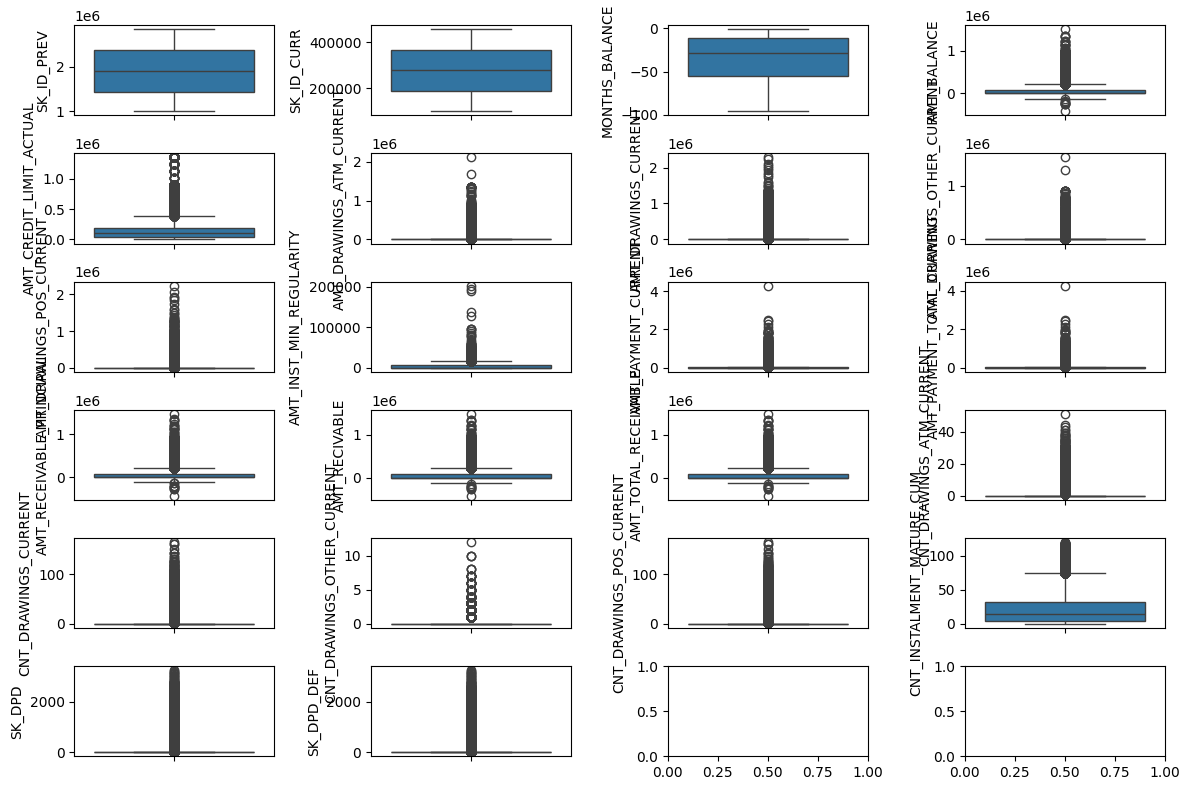

In [ ]:
fig, axes = plt.subplots(nrows=6, ncols=4, figsize=(12,8))
for i, col in enumerate(df_num.columns):
    sns.boxplot(data=df, y=col, ax=axes[i//4, i%4])

plt.tight_layout()
plt.show()

Terdapat beberapa feature yng memiliki outliers
 'MONTHS_BALANCE',
 'AMT_BALANCE',
 'AMT_CREDIT_LIMIT_ACTUAL',
 'AMT_DRAWINGS_ATM_CURRENT',
 'AMT_DRAWINGS_CURRENT',
 'AMT_DRAWINGS_OTHER_CURRENT',
 'AMT_DRAWINGS_POS_CURRENT',
 'AMT_INST_MIN_REGULARITY',
 'AMT_PAYMENT_CURRENT',
 'AMT_PAYMENT_TOTAL_CURRENT',
 'AMT_RECEIVABLE_PRINCIPAL',
 'AMT_RECIVABLE',
 'AMT_TOTAL_RECEIVABLE',
 'CNT_DRAWINGS_ATM_CURRENT',
 'CNT_DRAWINGS_CURRENT',
 'CNT_DRAWINGS_OTHER_CURRENT',
 'CNT_DRAWINGS_POS_CURRENT',
 'CNT_INSTALMENT_MATURE_CUM',
 'SK_DPD',
 'SK_DPD_DEF'

 Feature-feature tersebut perlu dilakukan handling outliers lalu mengganti nilai-nilai outlier tersebut dengan mengisi median.

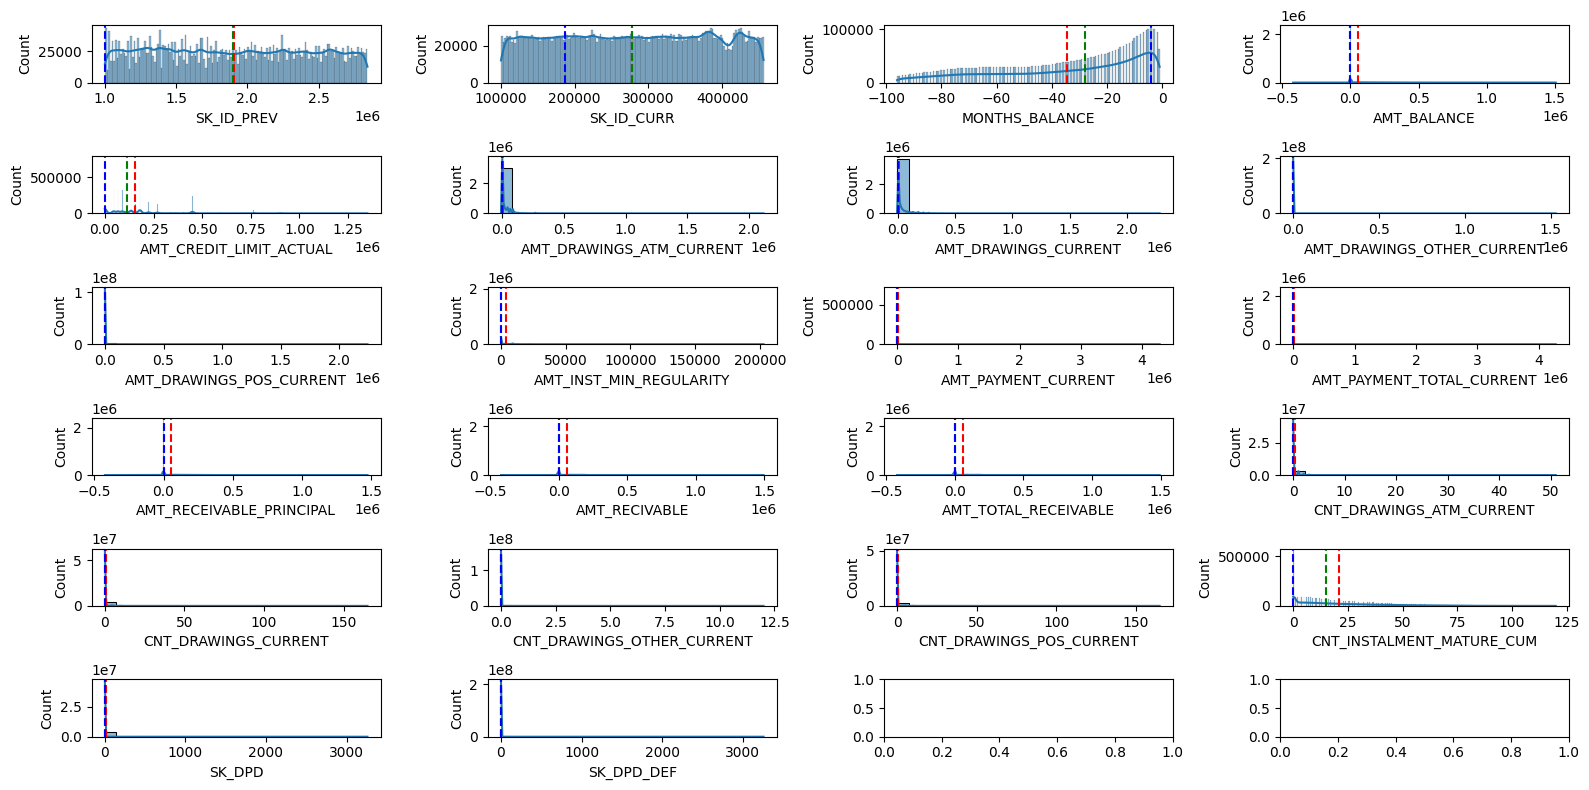

In [ ]:
fig, axes = plt.subplots(nrows=6, ncols=4, figsize=(16,8))
for i, col in enumerate(df_num.columns):

    # Calculate mean, median, and mode
    mean_val = df_num[col].mean()
    median_val = df_num[col].median()
    mode_val = df_num[col].mode().iloc[0]

    sns.histplot(data=df, x=col, ax=axes[i//4, i%4], kde=True)

    # Add vertical lines for mean, median, and mode
    axes[i // 4, i % 4].axvline(x=mean_val, color='r', linestyle='dashed', label='Mean')
    axes[i // 4, i % 4].axvline(x=median_val, color='g', linestyle='dashed', label='Median')
    axes[i // 4, i % 4].axvline(x=mode_val, color='b', linestyle='dashed', label='Mode')


plt.tight_layout()

plt.show()

In [ ]:
# Mengelompokkan berdasarkan 'Nama'
grouped_data = merged_df.groupby('TARGET')

# Mengambil grup 'A' dengan cara yang benar
data_subset = grouped_data.get_group((0))
print(data_subset)

         SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  AMT_BALANCE  \
1           1389973      337855              -4   236572.110   
2           1891521      126868              -1   453919.455   
3           2181852      367360              -4   291543.075   
4           1235299      203885              -5   201261.195   
5           2740914      340339              -1   131669.145   
...             ...         ...             ...          ...   
3227960     1036507      328243              -9        0.000   
3227961     1714892      347207              -9        0.000   
3227962     1302323      215757              -9   275784.975   
3227963     1624872      430337             -10        0.000   
3227964     2411345      236760             -10        0.000   

         AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  \
1                         225000                    2250.0   
2                         450000                       0.0   
3                         292500             

In [ ]:
sns.pairplot(data_subset)

<Axes: >

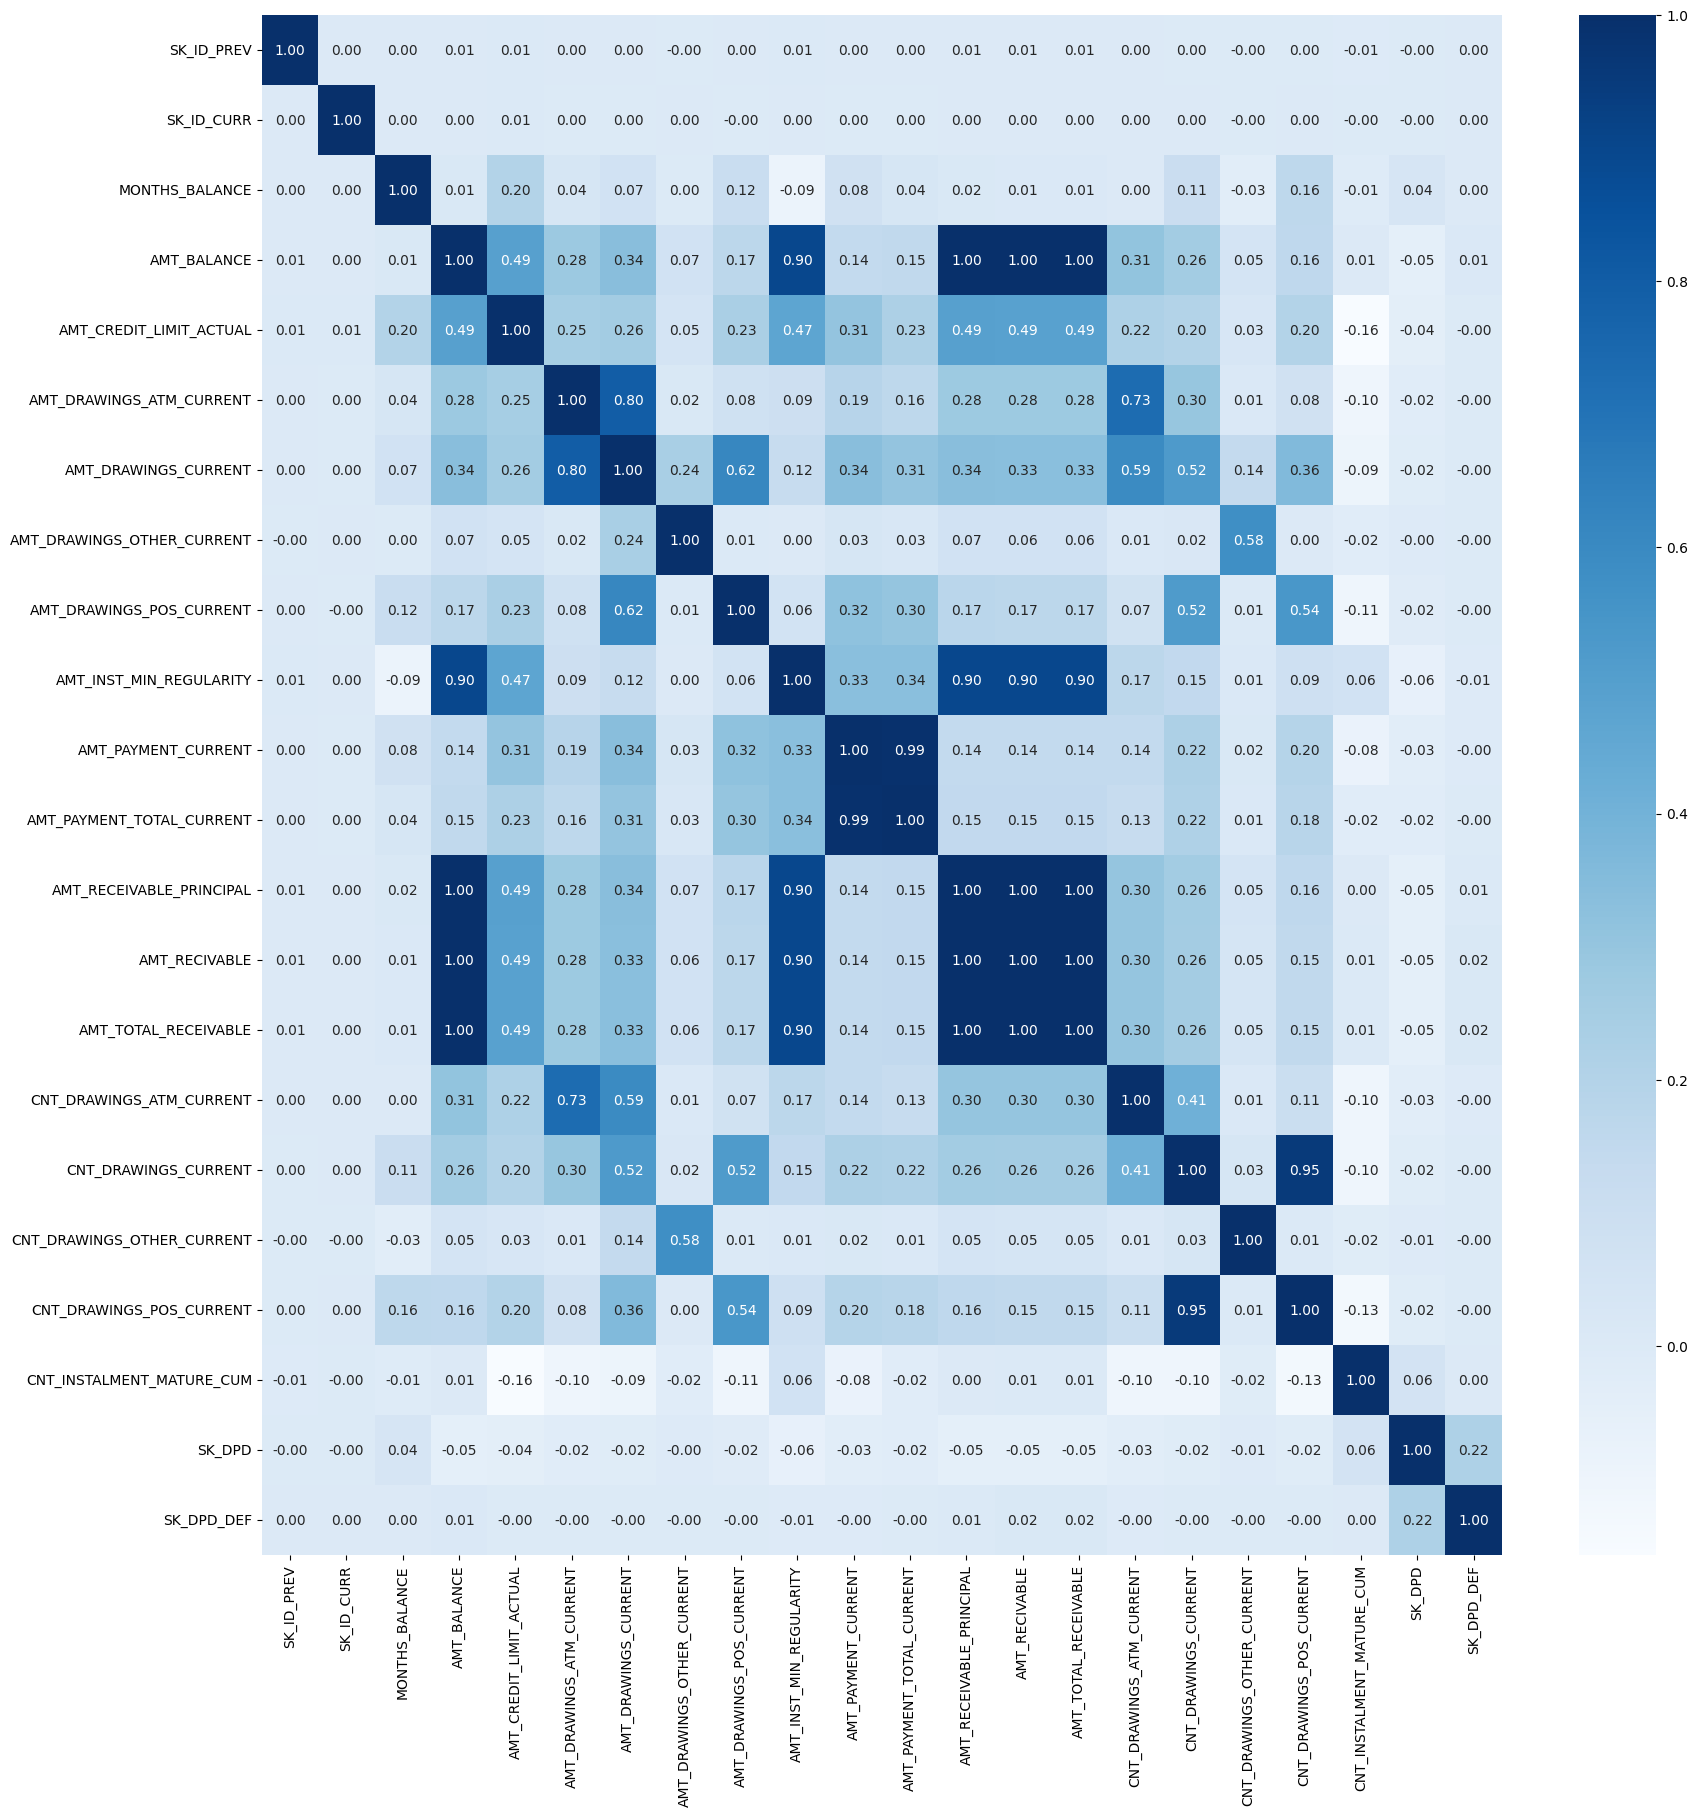

In [ ]:
plt.figure(figsize=(20, 20))
sns.heatmap(df_num.corr(), cmap='Blues', annot=True, fmt='.2f')

In [ ]:
plt.figure(figsize=(15, 15))
sns.pairplot(df_num, diag_kind='kde')

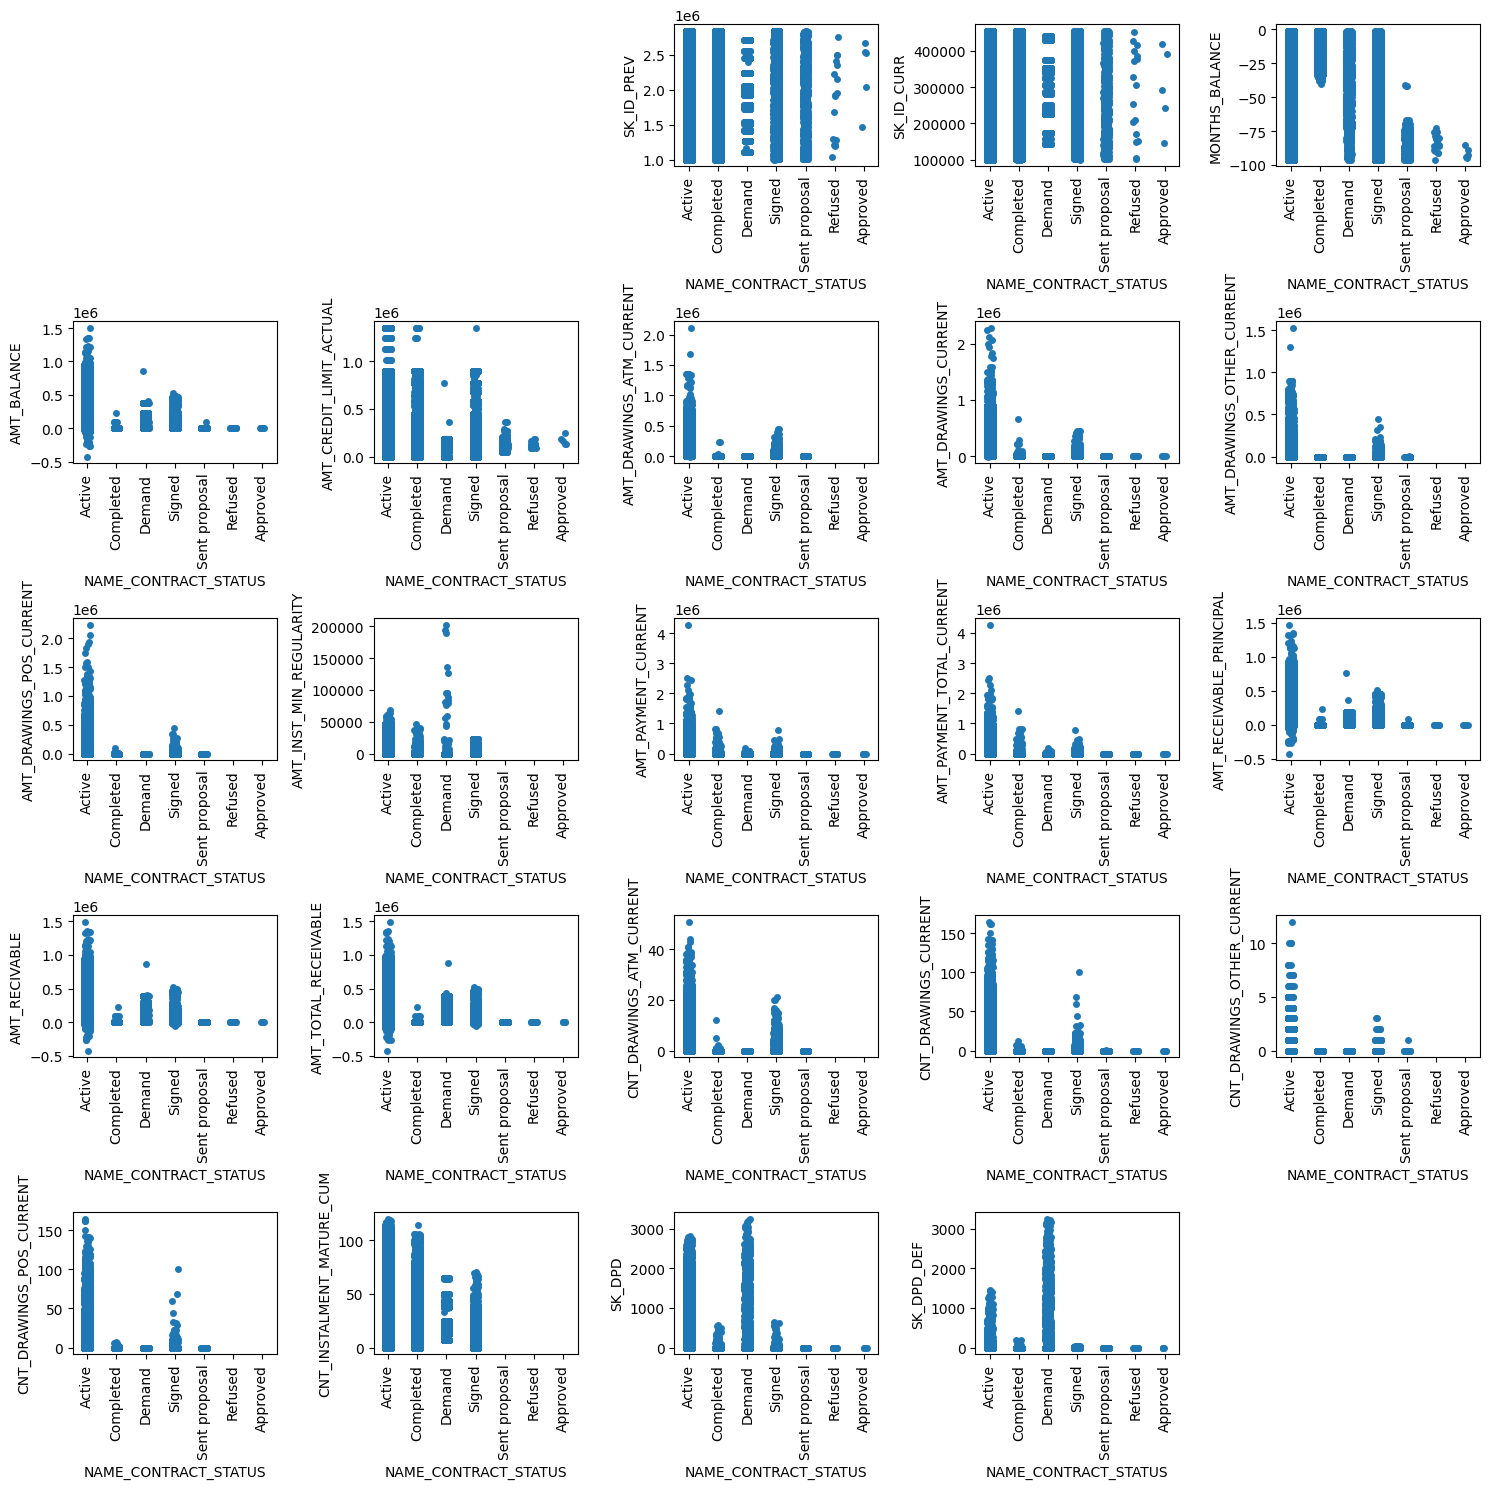

In [ ]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(numerics)): # untuk setiap kolom numerik
    ax = fig.add_subplot(5, 5, i+3) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='NAME_CONTRACT_STATUS', y=numerics[i]) # gambar catplot/stripplotnya
    plt.xticks(rotation=90)
    plt.tight_layout()

<Axes: xlabel='AMT_CREDIT_LIMIT_ACTUAL', ylabel='AMT_DRAWINGS_CURRENT'>

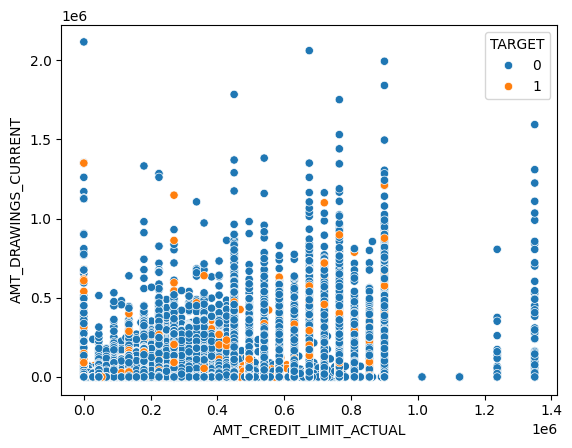

In [7]:
sns.scatterplot(x='AMT_CREDIT_LIMIT_ACTUAL', y='AMT_DRAWINGS_CURRENT', data=merged_df, hue='TARGET')

<Axes: xlabel='AMT_BALANCE', ylabel='AMT_CREDIT_LIMIT_ACTUAL'>

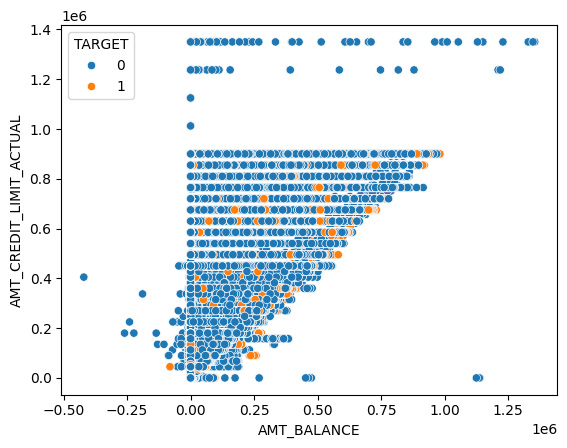

In [8]:
sns.scatterplot(x='AMT_BALANCE', y='AMT_CREDIT_LIMIT_ACTUAL', data=merged_df, hue='TARGET')

<Axes: xlabel='AMT_BALANCE', ylabel='AMT_TOTAL_RECEIVABLE'>

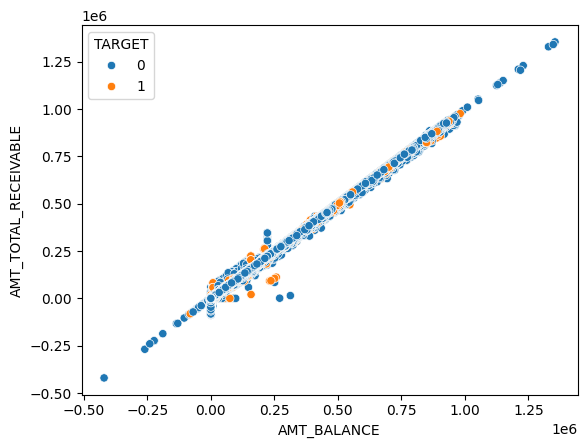

In [9]:
sns.scatterplot(x='AMT_BALANCE', y='AMT_TOTAL_RECEIVABLE', data=merged_df, hue='TARGET')

Text(0.5, 1.0, 'AMOUNT CREDIT LIMIT ACTUAL VS AMOUNT DRAWINGS CURRENT')

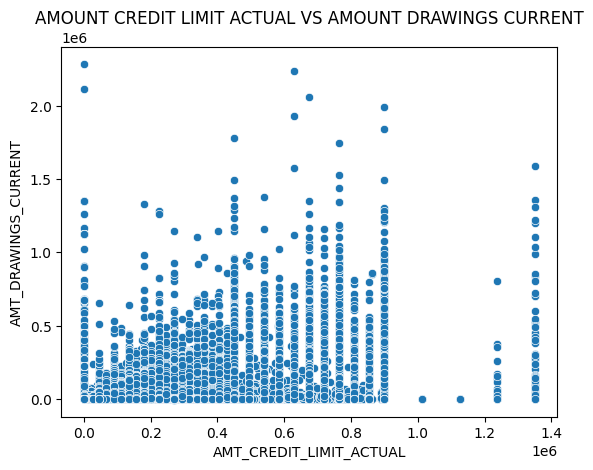

In [ ]:
sns.scatterplot(data=df, x='AMT_CREDIT_LIMIT_ACTUAL', y='AMT_DRAWINGS_CURRENT')
plt.title("AMOUNT CREDIT LIMIT ACTUAL VS AMOUNT DRAWINGS CURRENT")

Text(0.5, 1.0, 'AMOUNT BALANCE VS AMOUNT DRAWINGS CURRENT')

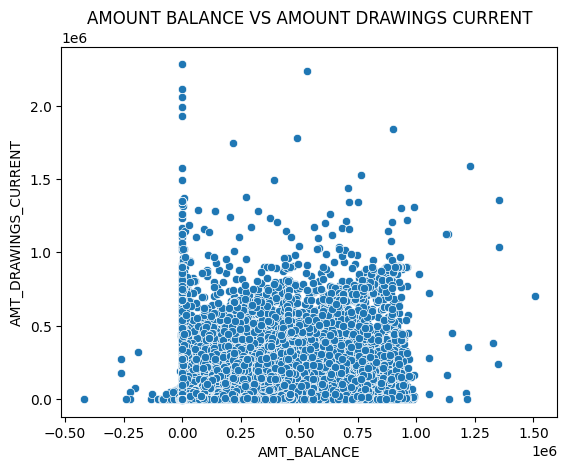

In [ ]:
sns.scatterplot(data=df, x='AMT_BALANCE', y='AMT_DRAWINGS_CURRENT')
plt.title("AMOUNT BALANCE VS AMOUNT DRAWINGS CURRENT")

Text(0.5, 1.0, 'AMOUNT BALANCE VS AMOUNT CREDIT LIMIT ACTUAL')

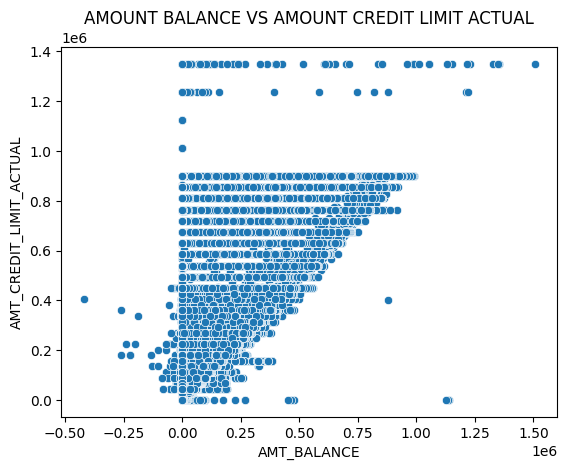

In [ ]:
sns.scatterplot(data=df, x='AMT_BALANCE', y='AMT_CREDIT_LIMIT_ACTUAL')
plt.title("AMOUNT BALANCE VS AMOUNT CREDIT LIMIT ACTUAL")

Text(0.5, 1.0, 'AMOUNT BALANCE VS AMOUNT TOTAL RECEIVABLE')

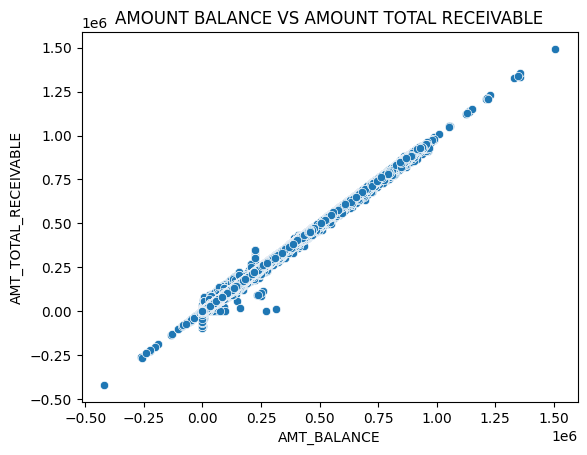

In [ ]:
sns.scatterplot(data=df, x='AMT_BALANCE', y='AMT_TOTAL_RECEIVABLE')
plt.title("AMOUNT BALANCE VS AMOUNT TOTAL RECEIVABLE")

Text(0.5, 1.0, 'AMOUNT CREDIT LIMIT ACTUAL VS AMOUNT TOTAL RECEIVABLE')

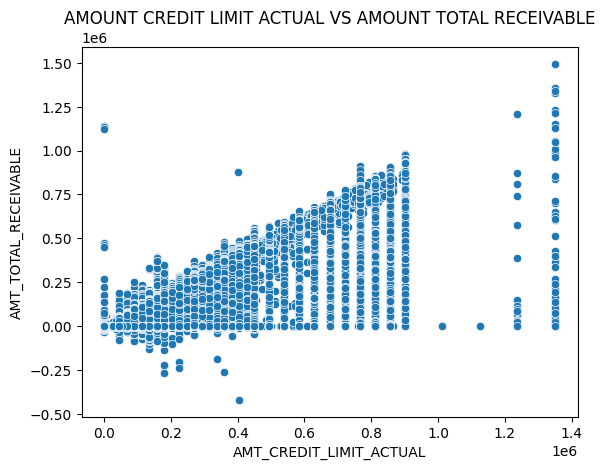

In [ ]:
sns.scatterplot(data=df, x='AMT_CREDIT_LIMIT_ACTUAL', y='AMT_TOTAL_RECEIVABLE')
plt.title("AMOUNT CREDIT LIMIT ACTUAL VS AMOUNT TOTAL RECEIVABLE")

Text(0.5, 1.0, 'AMOUNT DRAWINGS CURRENT VS AMOUNT TOTAL RECEIVABLE')

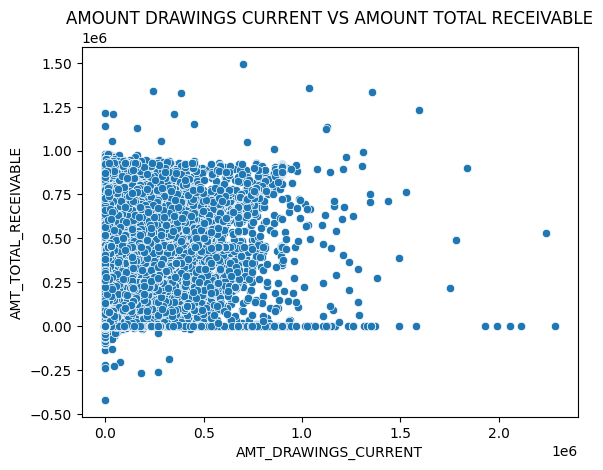

In [ ]:
sns.scatterplot(data=df, x='AMT_DRAWINGS_CURRENT', y='AMT_TOTAL_RECEIVABLE')
plt.title("AMOUNT DRAWINGS CURRENT VS AMOUNT TOTAL RECEIVABLE")

Text(0.5, 1.0, 'AMOUNT CREDIT LIMIT ACTUAL VS AMOUNT PAYMENT TOTAL CURRENT')

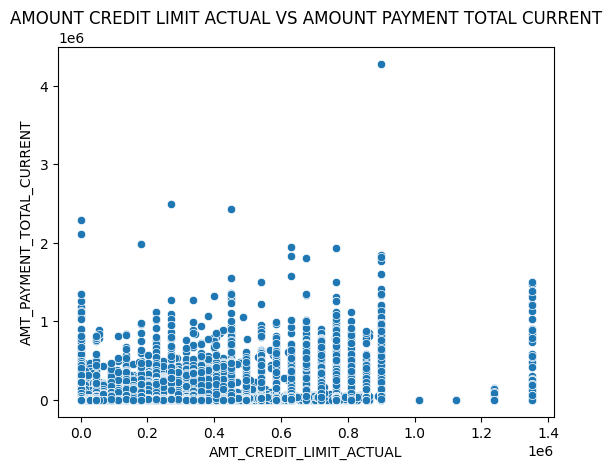

In [ ]:
sns.scatterplot(data=df, x='AMT_CREDIT_LIMIT_ACTUAL', y='AMT_PAYMENT_TOTAL_CURRENT')
plt.title("AMOUNT CREDIT LIMIT ACTUAL VS AMOUNT PAYMENT TOTAL CURRENT")

 A.Berdasarkan heatmap, didapatkan nilai korelasi antar feature maka ada beberapa feature yang cukup menarik dan diperlukan untuk dijadikan insight yaitu feature-feature berikut ini :
'MONTHS_BALANCE',
 'AMT_BALANCE',
 'AMT_CREDIT_LIMIT_ACTUAL',
 'AMT_DRAWINGS_ATM_CURRENT',
 'AMT_DRAWINGS_CURRENT',
 'AMT_DRAWINGS_OTHER_CURRENT',
 'AMT_PAYMENT_TOTAL_CURRENT',
 'AMT_RECIVABLE',
 'AMT_TOTAL_RECEIVABLE',
 'CNT_DRAWINGS_ATM_CURRENT',
 'CNT_DRAWINGS_CURRENT',
 'CNT_DRAWINGS_OTHER_CURRENT',
 'CNT_DRAWINGS_POS_CURRENT',
 'NAME_CONTRACT_STATUS',
 'SK_DPD',
 'SK_DPD_DEF'
 B. Feature- feature diatas dapat dipertahankan dan diambil insight nya untuk dapat dijadikan keputusan bisnis selanjutnya.
 Ada juga beberapa feature yang perlu dihilangkan seperti CNT_INSTALMENT_MATURE_CUM, AMT_RECEIVABLE_PRINCIPAL, AMT_RECIVABLE, AMT_PAYMENT_CURRENT
 Aada beberapa alasan menghilangkan feature-feature tersebut :
 Dikarenakan tidak memiliki nilai korelasi dengan feature lainnya dan memiliki sifat antara feature yng artinya sama dengan feature lainnya (Redundant)


**AMOUNT CREDIT LIMIT ACTUAL VS AMOUNT DRAWINGS CURRENT**
Korelas ini menunjukkan bahwa semakin banyak jumlah batas kredit yang diberikan maka jumlah penarikan yang diambil pengguna semakin banyak. Ini disebabkan bahwa pengguna semakin tinggi peluang untuk mendapatkan pinjaman yang lebih banyak

**AMOUNT BALANCE VS AMOUNT DRAWINGS CURRENT**
Korelasi ini menunjukkan bahwa semakin banyak jumlah saldo yang tersisa untuk maka jumlah penarikan yang diambil pengguna semakin banyak.

**AMOUNT BALANCE VS AMOUNT CREDIT LIMIT ACTUAL**
Korelasi ini menunjukkan bahwa jumlah saldo yang tersisa semakin tinggi maka pengguna mendapatkan jumlah batas kredit yang diberikan semakin banyak. Hal ini dikarenakan salso yang banyak dapat dikatakan dia mampu untuk memenuhi kewajibannya. Hal ini akan mendorong pemberi pinjaman untuk memberikan batas kredit yang tinggi.

**AMOUNT BALANCE VS AMOUNT TOTAL RECEIVABLE**
Korelasi ini menunjukkan bahwa jumlah saldo yang tersisa pleh pengguna maka semakin banyak penerimaan yang diterima oleh lembaga peminjam uang. Hal ini dikarenakan jumlah saldo yng tinggi mengindikasikan dia mampu bayar atau melakukan kewajiban sehingga total penerimaan bank semakin banyak.

**AMOUNT CREDIT LIMIT ACTUAL VS AMOUNT TOTAL RECEIVABLE***
Korelasi ini menunjukkan bahwa jumlah batas kredit yang diberikan pengguna semakin tinggi maka semakin banyak penerimaan yang diterima oleh lembaga peminjam uang. Hal ini dikarenakan pengguna lebih leluasa dalam mendapatkan pinjaman, sehingga uang yang harus dikembalikan termasuk bunga dll semakin banyak.

**AMOUNT DRAWINGS CURRENT VS AMOUNT TOTAL RECEIVABLE**
Korelasi ini menunjukkan bahwa jumlah penarikan (dalam uang) yang dilakukan pengguna semakin tinggi maka semakin banyak penerimaan yang diterima oleh lembaga peminjam uang.

**AMOUNT CREDIT LIMIT ACTUAL VS AMOUNT PAYMENT TOTAL CURRENT***
Korelasi ini menunjukkan bahwa jumlah batas kredit yang diberikan pengguna semakin tinggi maka semakin banyak pembayaran yang harus dibayar oleh pengguna. Ini berkolerasi karena pengguna yang memiliki kredit limit yang tinggi akan semakin berpeluang untuk lebih banyak meminjam dan akhirnya total uang yang harus dibayar juga semakin banyak.


Penawaran Batas Kredit yang Fleksibel:
Mengingat bahwa peningkatan batas kredit berhubungan dengan peningkatan jumlah penarikan dan pembayaran, perusahaan dapat mempertimbangkan untuk menawarkan batas kredit yang lebih fleksibel atau bertahap bagi pengguna yang menunjukkan kemampuan untuk membayar dengan baik.

Pengelolaan arus kas:
Amount Drawings Current yang tinggi bisa mengindikasikan bahwa pengguna menarik uang dari bisnis secara signifikan, yang dapat mengganggu arus kas jika tidak dikelola dengan baik.

Program Edukasi Keuangan:
Mengedukasi pengguna tentang pengelolaan kredit dan pinjaman bisa membantu mereka memahami risiko dan manfaat dari batas kredit yang lebih tinggi. Hal ini juga dapat meningkatkan loyalitas dan kepuasan pelanggan.


Strategi Pemasaran untuk Meningkatkan Penggunaan Kredit:
Mengembangkan kampanye pemasaran yang menonjolkan manfaat dari batas kredit yang lebih tinggi, serta cara-cara aman untuk memanfaatkan pinjaman, dapat menarik lebih banyak pengguna untuk melakukan penarikan.

Analisis Risiko yang Lebih Mendalam:
Menggunakan data untuk melakukan analisis risiko yang lebih baik dapat membantu dalam menentukan batas kredit yang sesuai bagi setiap pengguna, mengurangi risiko default, dan meningkatkan pendapatan dari pembayaran bunga.
